<a href="https://colab.research.google.com/github/ayishashaji/TASK-1/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUTHOR - AYISHA SHAJI**

# **PREDICTION USING SUPERVISED MACHINE LEARNING**

The task is to predict the percentage of a student based on the no. of study hours

## ***STEP 1 : IMPORTING THE DATASET***

In [11]:
#Importing the needed libraries
import pandas as pd   #For handling datset
import numpy as np    #For Numerical Calculations
import matplotlib.pyplot as plt   #For Graphical Visualisations
%matplotlib inline
import seaborn as sns  #For Data Visualisation

In [12]:
#reading the data from link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Data imported succesfully")

Data imported succesfully


In [13]:
# to view the entries
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
# to observe the number of rows and columns
df.shape

(25, 2)

In [15]:
#to observe the column names
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [16]:
# to observe their data types
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [17]:
# to know more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [18]:
# to observe more statistical information as mean , standard deviation , min , max and quartiles
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [19]:
# to check if our datasset contains null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

##***STEP 2: DATA VISUALIZATION***

Plotting the dataset to view whether the variables maintain a relationship between them or not

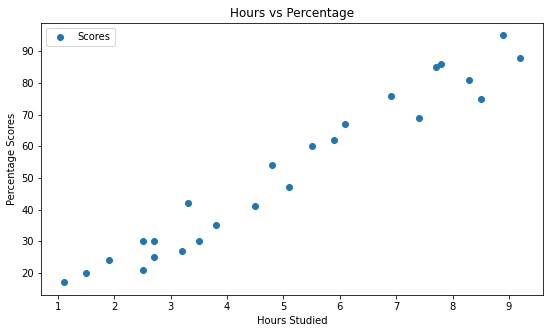

In [20]:
# Plotting the graph to see the relation and distribution of datapoints.

df.plot(x="Hours", y="Scores",figsize=(9,5),style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")
plt.show()

From the graph above, we can deduce that there is a linear relationship between "Hours studied" and "Percentage Score". Thus, we can use linear regression supervised machine learning model to predict future results

In [21]:
# to view the correlation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


For every 1 hour, score is 0.98 which means that there is a strong positive correlation between the variables

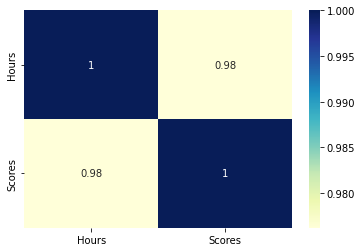

In [22]:
# to view a correlation graph
corr_graph = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
plt.show()

## ***STEP 3: DIVIDING THE DATA***

In this step, we will divide the data into two parts (training and testing)

In [23]:
#using iloc function we will separate the columns
X = df.iloc[:, :1].values  
Y = df.iloc[:, 1].values

X will be saving the values of the first column which is "hours" and Y will be saving the values of the second column which is "scores"

In [24]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [25]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [26]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

This means that data is divided with a portion of 80% training data and 20% testing data

Random state=0 means that data will be picked randomly from the dataset

## ***STEP 4: DATA TRAINING***

In this step, we will be applying linear regression model on the training data we have obtained

In [27]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


## ***STEP 5:MODEL VISUALIZATION***

Visualizing the model after training

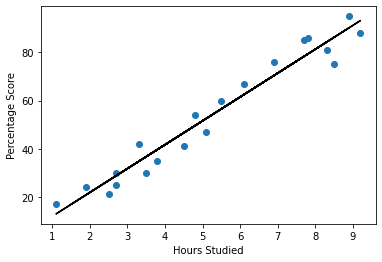

In [28]:
# m --> slope of the line 
m = regressor.coef_

# c --> intercept of the line
c = regressor.intercept_

# to model the best-fit line
line = m*X + c

# Plotting the training data using matplotlib.pyplot library
plt.scatter(X_train, Y_train)
plt.plot(X, line, color= 'black');

# to label the axis
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

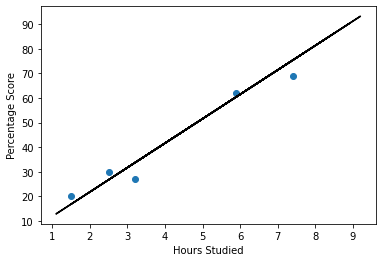

In [29]:
# Plotting the testing data using matplotlib.pyplot library
plt.scatter(X_test, Y_test)
plt.plot(X, line, color= 'black');

# to label the axis
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## ***STEP 6: APPLYING PREDICTION***

Now it's time to make some predictions

In [30]:
# Printing the testing data (Hours)
print(X_test) 

#Predicting the Scores 
Y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [31]:
#Printing the testing data (Scores)
Y_test

array([20, 27, 69, 30, 62])

In [32]:
#Printing the predicted data (Scores)
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [33]:
#Comparing Actual Vs Predicted using pandas library

compare = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) 

#printing 'compare'
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Applying Prediction Model using 9.25 hours/day

In [34]:
hours = 9.25
predicted_Score = regressor.predict([[hours]])
print ("The predicted score if a student studies",hours, "hours per day is:", predicted_Score[0])

The predicted score if a student studies 9.25 hours per day is: 93.69173248737539


##***STEP 7: MODEL EVALUATIO***N

In conclusion, we will evaluate our model using mean absolute error

In [35]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002982


# THANK YOU